In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
por_data = pd.read_csv('student-por.csv',sep=';')
mat_data = pd.read_csv('student-mat.csv',sep=';')

por_data['Gmean'] = por_data[['G1','G2','G3']].mean(axis=1)/20*100
mat_data['Gmean'] = mat_data[['G1','G2','G3']].mean(axis=1)/20*100

#por_data['Gmean'] = por_data['G1']+por_data['G2']+por_data['G3']
#mat_data['Gmean'] = mat_data['G1']+mat_data['G2']+mat_data['G3']

por_data_bak = por_data.copy()
mat_data_bak = mat_data.copy()

In [3]:
# columns that record in categories data
cat_cols = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher', 'internet', 'romantic']

# columns that record numeric data
con_cols = list(set(mat_data.columns)-set(cat_cols))

In [4]:
from sklearn.preprocessing import LabelEncoder

def categorical_transform(df):
    column_name = list(df.columns)
    labelencoder = LabelEncoder()
    for i in range(len(column_name)):
        if type(df[column_name[i]][1]) == str:
            df[column_name[i]] = labelencoder.fit_transform(df[column_name[i]])
    return df

por_data = categorical_transform(por_data)
mat_data = categorical_transform(mat_data)

### Find stuents who take both exam

In [5]:
#ren_por_data = por_data.rename(columns={'G1':'por_G1','G2':'por_G2','G3':'por_G3','Gmean':'por_Gmean'})
#ren_mat_data = mat_data.rename(columns={'G1':'mat_G1','G2':'mat_G2','G3':'mat_G3','Gmean':'mat_Gmean'})

ren_por_data = por_data_bak.rename(columns={'G1':'por_G1','G2':'por_G2','G3':'por_G3','Gmean':'por_Gmean'})
ren_mat_data = mat_data_bak.rename(columns={'G1':'mat_G1','G2':'mat_G2','G3':'mat_G3','Gmean':'mat_Gmean'})

bothtaken_data = pd.concat([ren_por_data,ren_mat_data])
#por_mat_data = por_mat_data.drop(columns=['G1','G2','G3'])
columns_check = ren_por_data.columns[:-4]#list(set(data.columns)-set(['G1','G2','G3']))
tmp = bothtaken_data[bothtaken_data.duplicated(subset=columns_check, keep='first')].reset_index(drop=True)
tmp2 = bothtaken_data[bothtaken_data.duplicated(subset=columns_check, keep='last')].reset_index(drop=True)

cols = ['por_G1','por_G2','por_G3','por_Gmean']
tmp[cols]=tmp2[cols]
bothtaken_data=tmp

In [6]:
len(bothtaken_data)

39

**Observation:** only 39 Students taken both exams

### Data mining

Portuguese HeatMap


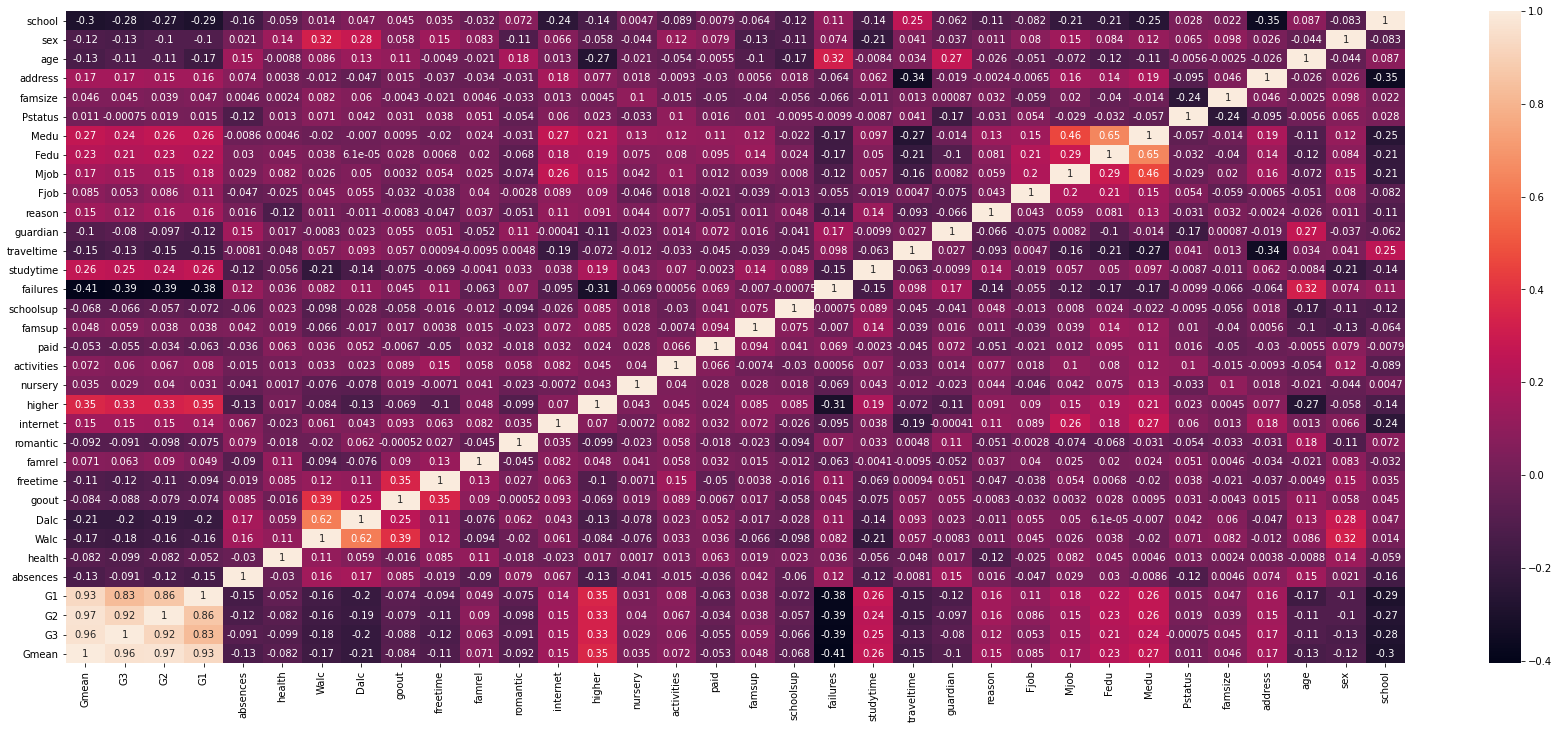

In [7]:
plt.figure(figsize=(30,12))
ax = sns.heatmap(por_data.corr(), annot=True)
ax.invert_xaxis()
print('Portuguese HeatMap')
plt.show()

Math HeatMap


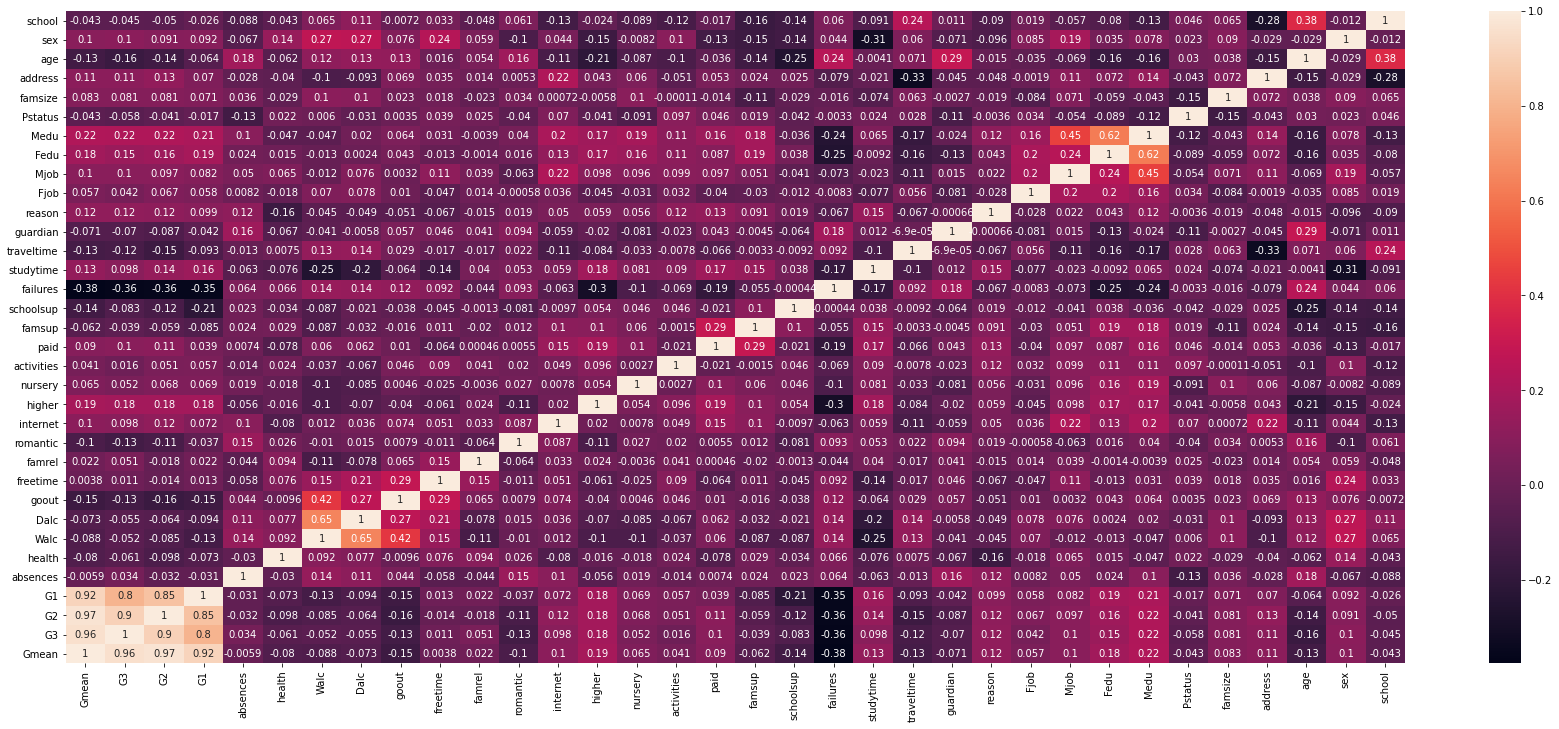

In [8]:
plt.figure(figsize=(30,12))
ax = sns.heatmap(mat_data.corr(), annot=True)
ax.invert_xaxis()
print('Math HeatMap')
plt.show()

Portuguese histogram


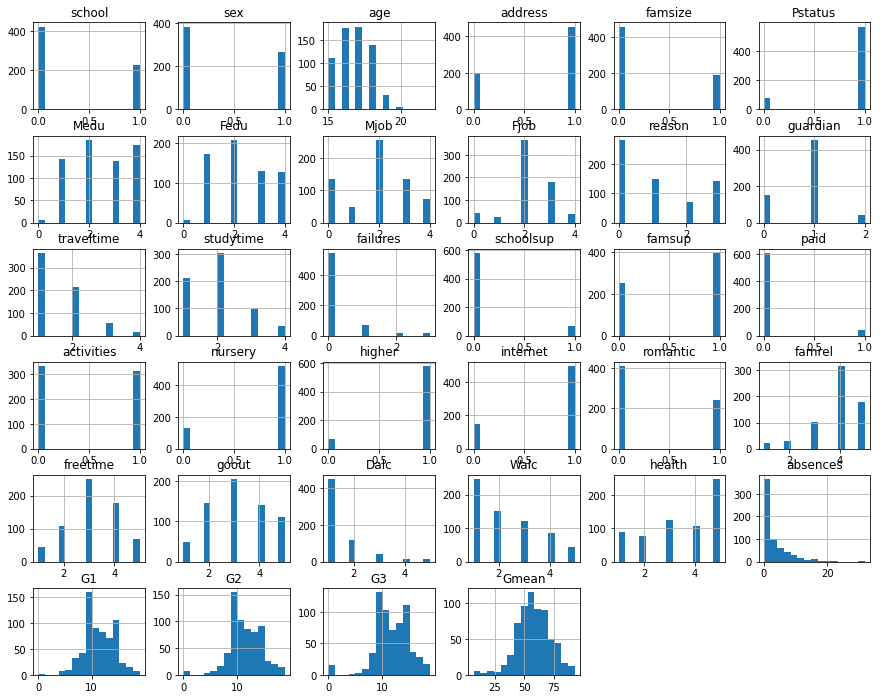

In [9]:
print('Portuguese histogram')
por_data.hist(figsize=(15,12),bins = 15)
plt.show()

Math histogram


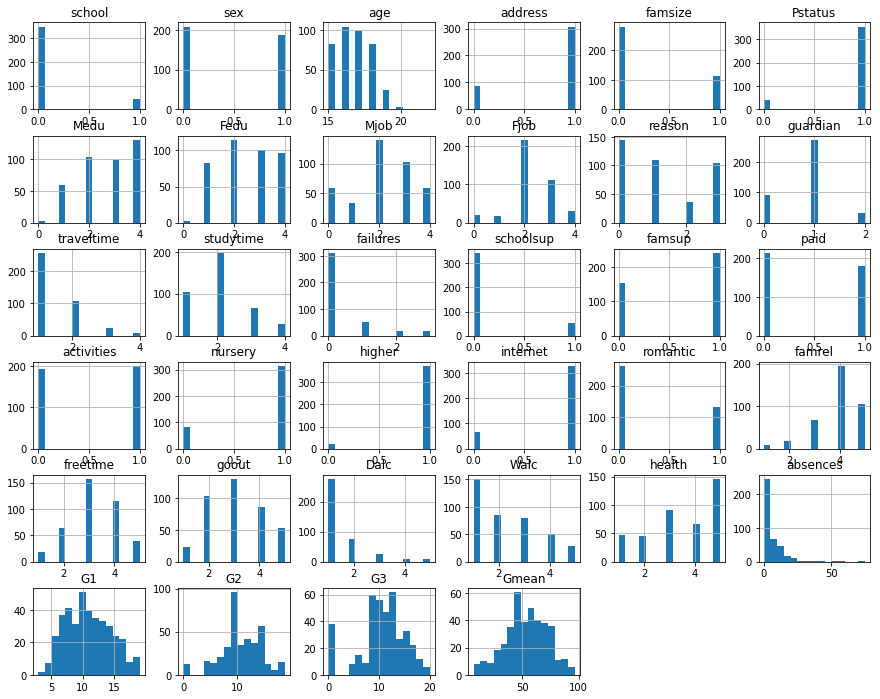

In [10]:
print('Math histogram')
mat_data.hist(figsize=(15,12),bins = 15)
plt.show()

**Observation:** 
- both distributions of math and portuguese don't have much differences **execpt exams' results from math**
- there's two peaks in the portugese's G1 G2 G3, \
the frequenest is 10 which is the pass score.\
This shows that teachers do adjust the result to let more students pass the exam.\
so it is better to take Gmean as indicator in portugues.
- parents' cohabitation, school, higher, nursery, internet access at home are **imbalance data**
- it is interesting that many pupils scored zero in math G3 exam.

In [11]:
mat_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Gmean'],
      dtype='object')

In [12]:
#dum_cols = ['sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher', 'internet', 'romantic']
dum_cols = cat_cols

dum_ren_mat_data = pd.get_dummies(ren_mat_data,columns=dum_cols)
dum_ren_por_data = pd.get_dummies(ren_por_data,columns=dum_cols)

mat_Gcols = ['mat_G1','mat_G2','mat_G3','mat_Gmean']
mat_corr = dum_ren_mat_data.corr()[mat_Gcols]
mat_corr = mat_corr.drop(mat_Gcols)

por_Gcols = ['por_G1','por_G2','por_G3','por_Gmean']
por_corr = dum_ren_por_data.corr()[por_Gcols]
por_corr = por_corr.drop(por_Gcols)

In [13]:
#tmp_por_data = categorical_transform(tmp_por_data)
#tmp_mat_data = categorical_transform(tmp_mat_data)
#mat_corr=ren_mat_data.corr()[-3:].T
#por_corr=ren_por_data.corr()[-3:].T

In [14]:
both_corr = mat_corr.copy()
both_corr[['por_G1','por_G2','por_G3','por_Gmean']]=por_corr

<AxesSubplot:>

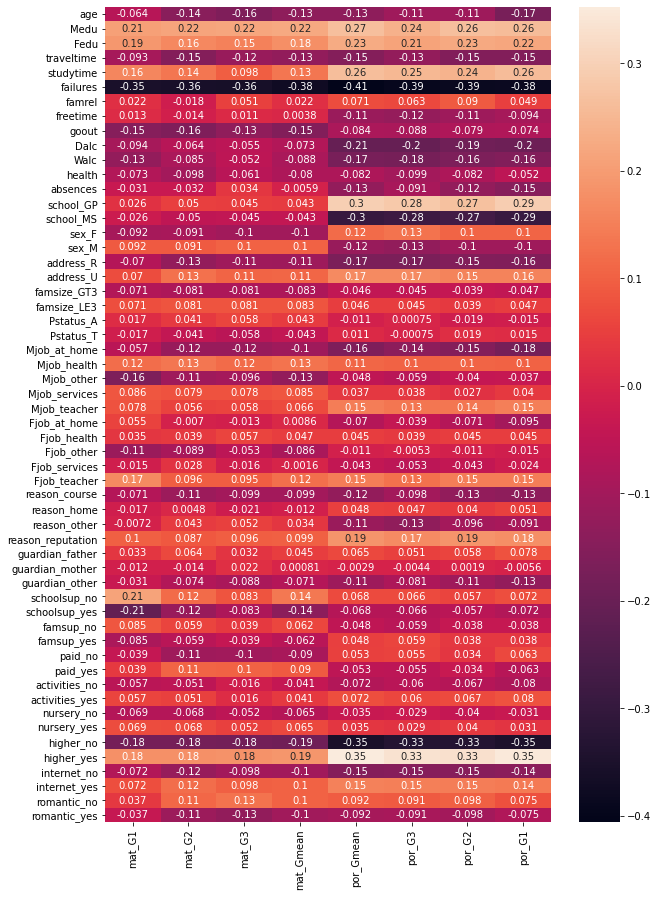

In [15]:
#both_cor = both_cor[:-3]
sequences = mat_Gcols + [x for x in reversed(por_Gcols)]
plt.figure(figsize=(10,15))
sns.heatmap(both_corr[sequences], annot=True)

### Observation between Math and Portuguese

**mentionable correrations**

these may affect Portuguese result in posivite way:
- School
- is Female
- address
- Parents' educations and jobs
- reason to choose this school
- higher education

Math have less correration compare to Portuguese in :
- school
- address
- Parents' Education especially Father
- Parents' Job
- Reason to choose their school
- study time
- wants to take higher education
- internet access at home
- alcohol

Math have more correration compare to Portugese in :
(positive)
- going out with friends
- extra paid classes within the course subject
- is male
(negative)
- extra educational support (**this is negative correration?**)



In [16]:
dum_mat_data = pd.get_dummies(mat_data, columns=cat_cols)
dum_por_data = pd.get_dummies(por_data, columns=cat_cols)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [18]:
#data_por_3 = data_por_2.copy()
por_x = dum_por_data.drop(columns = ["G1", "G2", "G3", "Gmean"])
por_y = dum_por_data["Gmean"]
por_train_x, por_test_x, por_train_y, por_test_y = train_test_split(por_x, por_y, train_size = 0.5, random_state = 1039)


mat_x = dum_mat_data.drop(columns = ["G1", "G2", "G3", "Gmean"])
mat_y = dum_mat_data["Gmean"]
mat_train_x, mat_test_x, mat_train_y, mat_test_y = train_test_split(mat_x, mat_y, train_size = 0.5, random_state = 1039)

In [19]:
def report(predict,actual,title=None):
    if title: print(title)
    stddev = (np.sum((np.array(predict)-np.array(actual))**2)/len(por_predict))**.5
    print('Std deviation:',stddev)
    plt.figure(figsize=(5,5))
    plt.scatter(actual,predict)
    #plt.axline((0,0),(20,20))
    plt.axline((0,0),(100,100))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.axis('equal')
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

Train Result:
Std deviation: 4.340722299971525


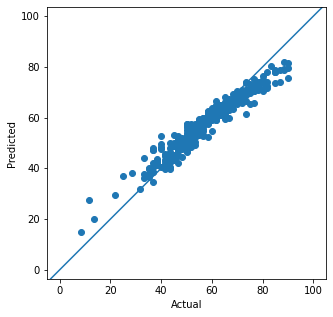

Test Result:
Std deviation: 12.111829211048462


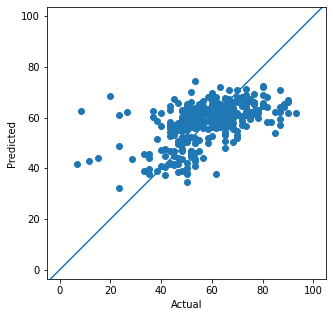

In [21]:
rdg = RandomForestRegressor()
rdg.fit(por_train_x, por_train_y)
por_predict = rdg.predict(por_test_x)

report(rdg.predict(por_train_x),por_train_y,'Train Result:')
report(por_predict, por_test_y,'Test Result:')

In [22]:
def show_feature_importances(classifier):
    std = np.std([
        tree.feature_importances_ for tree in rdg.estimators_], axis=0)

    plt.figure(figsize=(16,5))
    importances_pd = pd.Series(classifier.feature_importances_,index=mat_train_x.columns)
    importances_pd.plot.bar(yerr=std)
    #importances_pd.plot.bar()
    #fig.tight_layout()
    #plt.gca().figure.set_size(13,13)
    plt.show()

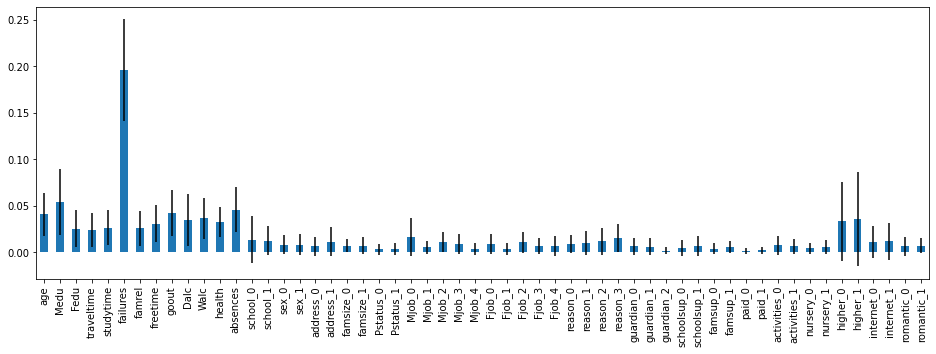

In [23]:
show_feature_importances(rdg)

Train Result:
Std deviation: 4.6687494436434855


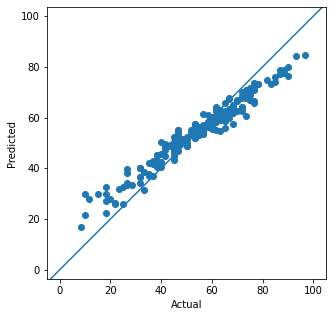

Test Result:
Std deviation: 13.022247498589861


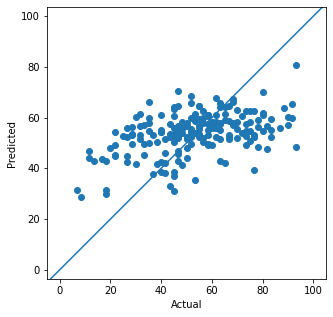

In [24]:
rdg_mat = RandomForestRegressor()
rdg_mat.fit(mat_train_x, mat_train_y)
mat_predict = rdg_mat.predict(mat_test_x)

report(rdg_mat.predict(mat_train_x),mat_train_y,'Train Result:')
report(mat_predict, mat_test_y,'Test Result:')

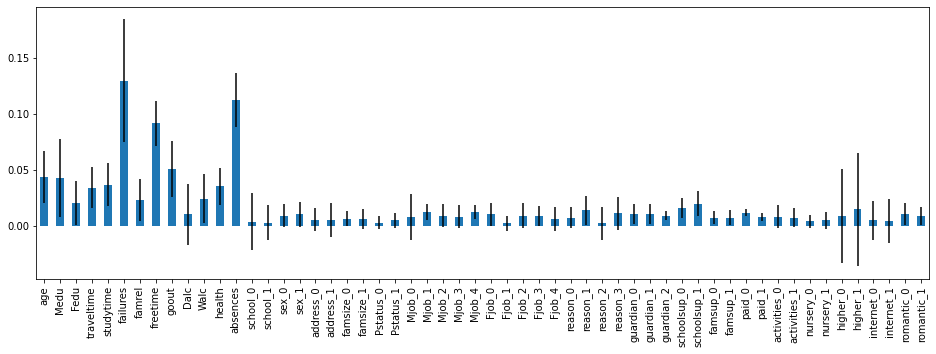

In [25]:
show_feature_importances(rdg_mat)